In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Dataset Final/Patient's-ReportFinal.xlsx")
df.head()

,Age,Sex,Hemoglobin(HB%),ESR,Total WBC Count,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,...,HTC/PCV,MCV,MCH,MCHC,RDW-CV,RDW-SD,Platelet Count,MPV,PDW,PCT
0,31,Female,7.8,80,82000,54.0,40.0,4.0,2.0,0.0,...,25.0,66.8,20.9,31.3,17.4,39.6,583000,9.4,15.5,0.549
1,65,Female,11.0,35,5900,51.0,43.0,4.0,2.0,0.0,...,33.6,85.9,28.2,32.9,14.6,43.1,176000,13.7,16.5,0.242
2,23,Male,14.4,20,6300,47.0,46.0,5.0,2.0,0.0,...,42.9,73.9,24.8,33.6,15.2,36.8,210000,10.2,16.0,0.214
3,9,Female,13.0,10,9900,40.0,54.0,4.0,2.0,0.0,...,38.0,83.4,28.6,34.3,13.9,39.0,392000,9.6,16.2,0.377
4,36,Female,8.2,110,16900,75.0,17.0,6.0,2.0,0.0,...,24.8,69.8,23.1,33.1,17.7,42.0,246000,10.5,15.4,0.258


In [ ]:
df.info

<bound method DataFrame.info of      Age     Sex  Hemoglobin(HB%)  ESR  Total WBC Count  Neutrophils  \
0     31  Female              7.8   80            82000         54.0   
1     65  Female             11.0   35             5900         51.0   
2     23    Male             14.4   20             6300         47.0   
3      9  Female             13.0   10             9900         40.0   
4     36  Female              8.2  110            16900         75.0   
..   ...     ...              ...  ...              ...          ...   
516   31  Female              7.8   80            82000         54.0   
517   65  Female             11.0   35             5900         51.0   
518   23    Male             14.4   20             6300         47.0   
519    9  Female             13.0   10             9900         40.0   
520   36  Female              8.2  110            16900         75.0   

     Lymphocytes  Monocytes  Eosinophils  Basophils  ...  HTC/PCV   MCV   MCH  \
0           40.0      

# Data Labeling

In [ ]:
for i in range(df.shape[0]):
    if df.loc[i,'Platelet Count']>150000:
        df.loc[i,'Labels']='Negative'
    else:
        df.loc[i,'Labels']='Positive'

In [ ]:
df.head(10)

,Age,Sex,Hemoglobin(HB%),ESR,Total WBC Count,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,Platelet Count,MPV,PDW,PCT,Labels
0,31,Female,7.8,80,82000,54.0,40.0,4.0,2.0,0.0,...,66.8,20.9,31.3,17.4,39.6,583000,9.4,15.5,0.549,Negative
1,65,Female,11.0,35,5900,51.0,43.0,4.0,2.0,0.0,...,85.9,28.2,32.9,14.6,43.1,176000,13.7,16.5,0.242,Negative
2,23,Male,14.4,20,6300,47.0,46.0,5.0,2.0,0.0,...,73.9,24.8,33.6,15.2,36.8,210000,10.2,16.0,0.214,Negative
3,9,Female,13.0,10,9900,40.0,54.0,4.0,2.0,0.0,...,83.4,28.6,34.3,13.9,39.0,392000,9.6,16.2,0.377,Negative
4,36,Female,8.2,110,16900,75.0,17.0,6.0,2.0,0.0,...,69.8,23.1,33.1,17.7,42.0,246000,10.5,15.4,0.258,Negative
5,45,Female,13.2,55,8500,60.0,34.0,4.0,2.0,0.0,...,84.6,28.1,33.2,14.6,42.0,343000,10.6,16.4,0.364,Negative
6,17,Female,13.8,21,5300,52.0,41.0,5.0,2.0,0.0,...,78.6,26.5,33.7,14.8,39.1,193000,10.8,15.9,0.209,Negative
7,8,Female,11.8,70,8500,54.0,40.0,4.0,2.0,0.0,...,78.6,27.4,34.9,13.5,35.6,19300,10.4,16.1,0.200,Positive
8,4,Female,10.1,40,14600,57.0,37.0,4.0,2.0,0.0,...,78.3,27.0,34.4,14.3,38.1,52600,10.3,16.1,0.543,Positive
9,28,Male,15.3,5,9200,55.0,36.0,6.0,3.0,0.0,...,81.6,28.3,34.6,14.2,38.9,231000,44.4,16.6,0.264,Negative


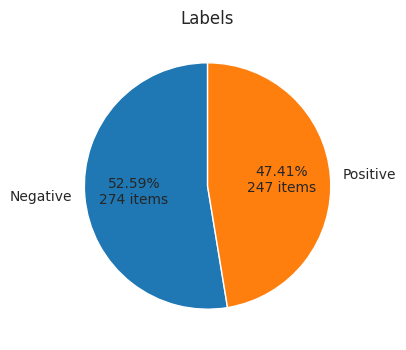

In [ ]:
# Defining a function to plot a simple pie chart
def plotPie(value, title, label):
    plt.figure(figsize=(4,4))
    plt.pie(
        value.value_counts(),
        startangle=90,
        labels = label,
        autopct=(lambda p:f'{p:.2f}%\n{p*sum(value.value_counts())/100 :.0f} items')
    )
    plt.title(title)
    plt.show()

plotPie(df["Labels"], "Labels", ["Negative", "Positive"])

In [ ]:
df.columns

Index(['Age', 'Sex', 'Hemoglobin(HB%)', 'ESR', 'Total WBC Count',
       'Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils', 'Basophils',
       'Total Cir. Eosinophils', 'RBC Count', 'HTC/PCV', 'MCV', 'MCH', 'MCHC',
       'RDW-CV', 'RDW-SD', 'Platelet Count', 'MPV', 'PDW', 'PCT', 'Labels'],
      dtype='object')

## Print the data types

In [ ]:
df.dtypes

Age                         int64
Sex                        object
Hemoglobin(HB%)           float64
ESR                         int64
Total WBC Count             int64
Neutrophils               float64
Lymphocytes               float64
Monocytes                 float64
Eosinophils               float64
Basophils                 float64
Total Cir. Eosinophils    float64
RBC Count                 float64
HTC/PCV                   float64
MCV                       float64
MCH                       float64
MCHC                      float64
RDW-CV                    float64
RDW-SD                    float64
Platelet Count              int64
MPV                       float64
PDW                       float64
PCT                       float64
Labels                     object
dtype: object

In [ ]:
df.shape

(521, 23)

# Applied Data Preprocessing Techniques:
- Handling Missing Values
- Label Encoding
- Scaling Transformation

## Handling Missing Values

In [ ]:
df.isnull().sum()

Age                       0
Sex                       0
Hemoglobin(HB%)           0
ESR                       0
Total WBC Count           0
Neutrophils               0
Lymphocytes               0
Monocytes                 0
Eosinophils               6
Basophils                 0
Total Cir. Eosinophils    0
RBC Count                 0
HTC/PCV                   0
MCV                       0
MCH                       0
MCHC                      0
RDW-CV                    0
RDW-SD                    0
Platelet Count            0
MPV                       0
PDW                       0
PCT                       0
Labels                    0
dtype: int64

## Removing Missing Value

In [ ]:
df = df.groupby(df.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

In [ ]:
df.isnull().sum()

Age                       0
Sex                       0
Hemoglobin(HB%)           0
ESR                       0
Total WBC Count           0
Neutrophils               0
Lymphocytes               0
Monocytes                 0
Eosinophils               0
Basophils                 0
Total Cir. Eosinophils    0
RBC Count                 0
HTC/PCV                   0
MCV                       0
MCH                       0
MCHC                      0
RDW-CV                    0
RDW-SD                    0
Platelet Count            0
MPV                       0
PDW                       0
PCT                       0
Labels                    0
dtype: int64

## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
df.sample(5)

,Age,Sex,Hemoglobin(HB%),ESR,Total WBC Count,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,Platelet Count,MPV,PDW,PCT,Labels
41,36,0,2,24,55,39,8,4,2,0,...,18,5,3,20,20,65,5,14,59,0
307,33,1,8,17,5,22,21,5,3,0,...,8,14,24,26,21,2,8,18,14,1
115,14,0,17,18,47,25,22,2,2,0,...,4,7,21,28,15,61,23,13,55,0
395,20,1,37,1,32,19,24,5,3,0,...,6,9,23,20,7,45,17,17,41,0
448,12,0,7,17,1,15,31,4,2,0,...,23,7,4,18,22,8,25,28,9,1


# Scaling Transformation

In [ ]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.sample(5)

,Age,Sex,Hemoglobin(HB%),ESR,Total WBC Count,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,Platelet Count,MPV,PDW,PCT,Labels
362,0.675676,1.0,0.913043,0.107143,0.196429,0.000000,0.595238,0.875,0.9,0.5,...,0.542373,0.666667,0.885714,0.405405,0.00,0.880597,0.021739,0.12500,0.984848,0.0
307,0.891892,1.0,0.173913,0.607143,0.089286,0.511628,0.500000,0.625,0.3,0.0,...,0.135593,0.291667,0.685714,0.702703,0.42,0.029851,0.173913,0.56250,0.212121,1.0
231,0.702703,1.0,0.543478,0.964286,0.553571,0.534884,0.523810,0.500,0.2,0.0,...,0.423729,0.208333,0.200000,0.405405,0.32,0.686567,0.195652,0.56250,0.575758,0.0
265,0.621622,0.0,0.739130,0.750000,0.571429,0.511628,0.642857,0.125,0.1,0.0,...,0.000000,0.312500,0.228571,0.486486,0.86,0.507463,0.760870,0.75000,0.969697,1.0
449,0.162162,1.0,0.413043,0.142857,0.125000,0.255814,0.833333,0.375,0.2,0.0,...,0.305085,0.125000,0.142857,0.810811,0.78,0.492537,0.782609,0.84375,0.560606,1.0


In [ ]:
np.abs(df.iloc[:,:-1].corrwith(df['Labels'])).sort_values(ascending = False)

Platelet Count            0.857513
PCT                       0.634831
Total WBC Count           0.438462
Lymphocytes               0.328823
Neutrophils               0.276621
Total Cir. Eosinophils    0.234772
Age                       0.201274
PDW                       0.195648
ESR                       0.164315
MPV                       0.162152
Sex                       0.148847
MCH                       0.106482
RDW-CV                    0.097923
Monocytes                 0.047975
RBC Count                 0.038778
RDW-SD                    0.037786
Basophils                 0.037374
MCV                       0.035454
Hemoglobin(HB%)           0.031441
MCHC                      0.018394
Eosinophils               0.010161
HTC/PCV                   0.008606
dtype: float64

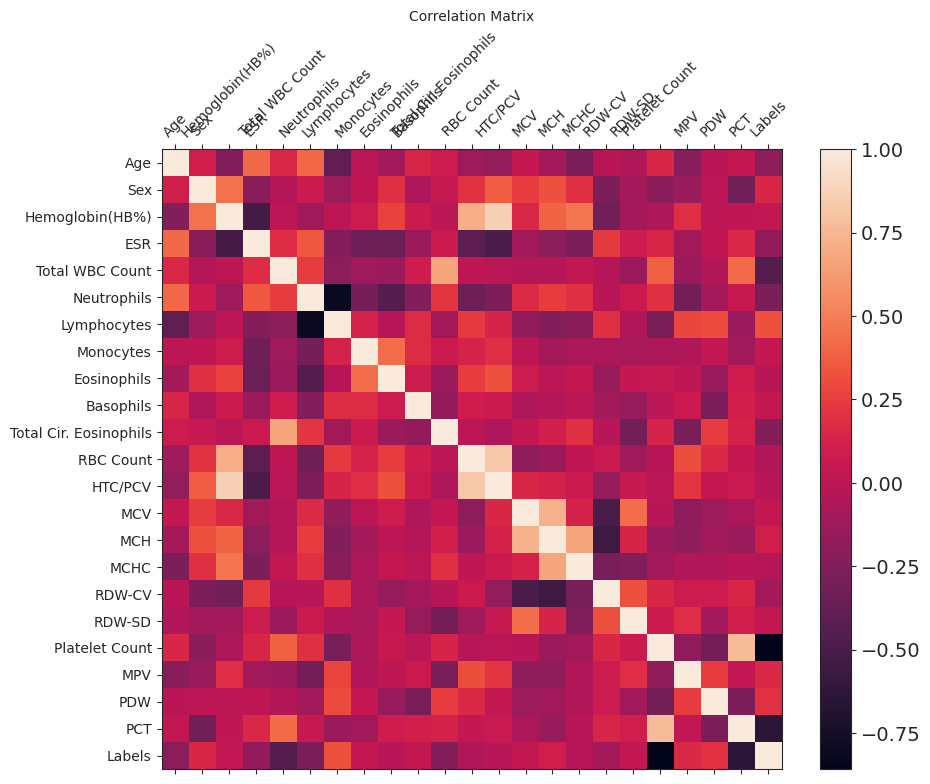

In [ ]:
f = plt.figure(figsize=(10, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=10);

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix

## Test Train Split 30:70

In [ ]:
predictors = df.drop(['Labels'], axis= 1)
target = df['Labels']
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.30, random_state = 0, stratify=target)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(364, 22) (364,)
(157, 22) (157,)


In [ ]:
classifiers_description = {"model":[],"precision":[], "recall":[],"f1-score":[], "accuracy":[], "standard_deviation" :[]}

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from numpy import mean
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# Helper Function

In [ ]:
def model_accuracy(classifier = None, predictors=None, target= None, n_splits = 20):
    start_time = datetime.now()
    global classifiers_description
    # helper function for Model Evaluation

    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    y_pred = cross_val_predict(classifier, predictors, target, cv=kf)
    scores = cross_val_score(classifier, predictors, target, cv=kf)

    #confusion matrix

    cf_matrix = confusion_matrix(target, y_pred)
    sns.set_style('ticks')
    fig, ax = plt.subplots()
    sns.heatmap(cf_matrix,annot=True, ax=ax, fmt='g', cmap='Blues')

    #classifier description report
    report = classification_report(target, y_pred, output_dict=True)
    classifier_name = type(classifier).__name__
    if classifier_name not in classifiers_description["model"]:
        classifiers_description["model"].append(classifier_name)
        classifiers_description["precision"].append(report['weighted avg']["precision"])
        classifiers_description["recall"].append(report['weighted avg']["recall"])
        classifiers_description["f1-score"].append(report['weighted avg']["f1-score"])
        classifiers_description["accuracy"].append(scores.mean())
        classifiers_description["standard_deviation"].append(scores.std())


    print(classification_report(target, y_pred))
    # Plot the ROC-AUC Curve for model-1 :
    fpr, tpr, thresholds = roc_curve(target, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()

    TP = cf_matrix[0][0]
    TN = cf_matrix[1][1]
    FP = cf_matrix[0][1]
    FN = cf_matrix[1][0]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)

    print("Performance: \n")
    print("TPR=   ",mean(TPR)*100)
    print("TNR=   ",mean(TNR)*100)
    print("Pre=   ",mean(PPV)*100)
    print("FPR=   ",mean(FPR)*100)
    print("FNR=   ",mean(FNR)*100)
    print("\n")

    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))

    return (scores.mean(), scores.std())

# Gaussian Naive Bayes

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       173
         1.0       0.96      0.92      0.94       191

    accuracy                           0.94       364
   macro avg       0.94      0.94      0.94       364
weighted avg       0.94      0.94      0.94       364



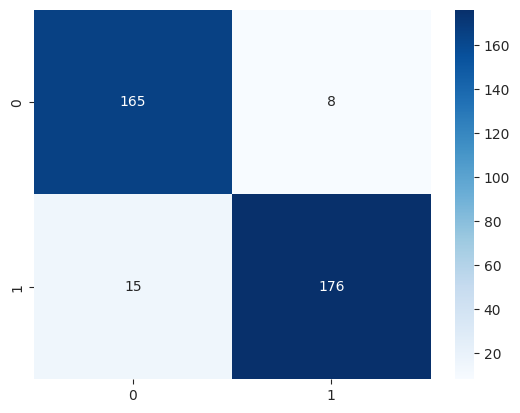

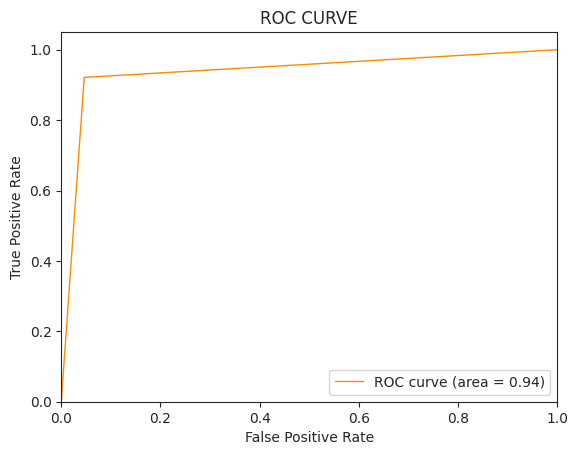

Performance: 

TPR=    91.66666666666666
TNR=    95.65217391304348
Pre=    95.37572254335261
FPR=    4.3478260869565215
FNR=    8.333333333333332


Duration: 0:00:00.791998


(0.9364114114114115, 0.044936117043813825)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_GNB = GaussianNB()
model_accuracy(classifier=clf_GNB, predictors=x_train, target=y_train)

#BernoulliNB

              precision    recall  f1-score   support

         0.0       0.67      0.64      0.65       173
         1.0       0.69      0.71      0.70       191

    accuracy                           0.68       364
   macro avg       0.68      0.68      0.68       364
weighted avg       0.68      0.68      0.68       364



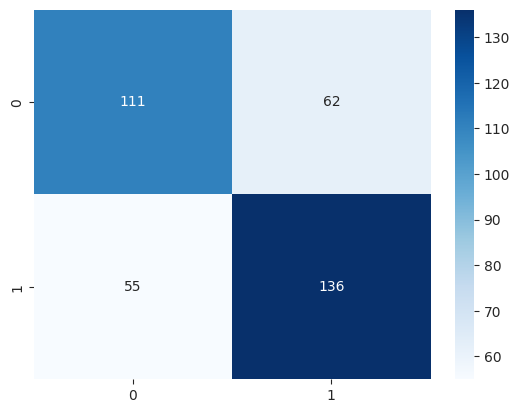

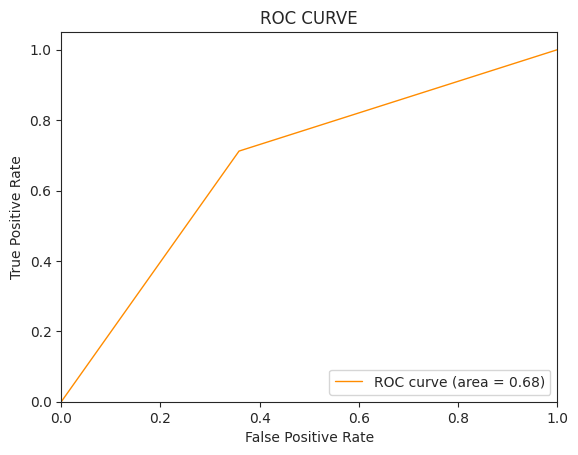

Performance: 

TPR=    66.86746987951807
TNR=    68.68686868686868
Pre=    64.16184971098265
FPR=    31.313131313131315
FNR=    33.13253012048193


Duration: 0:00:00.947254


(0.6785285285285286, 0.051190852564390356)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf_BNB = BernoulliNB()
model_accuracy(classifier=clf_BNB, predictors=x_train, target=y_train)

# MLPClassifier

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       173
         1.0       0.98      0.97      0.98       191

    accuracy                           0.98       364
   macro avg       0.98      0.98      0.98       364
weighted avg       0.98      0.98      0.98       364



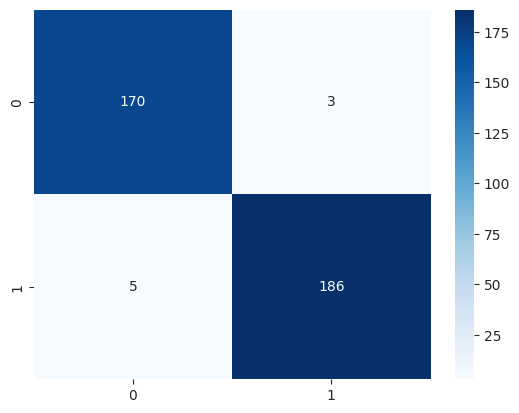

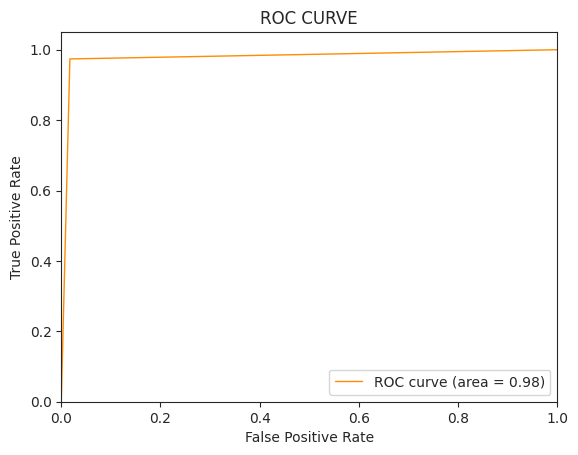

Performance: 

TPR=    97.14285714285714
TNR=    98.4126984126984
Pre=    98.26589595375722
FPR=    1.5873015873015872
FNR=    2.857142857142857


Duration: 0:00:09.640886


(0.977852852852853, 0.03887881476991795)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_MLP = MLPClassifier()
model_accuracy(classifier=clf_MLP, predictors=x_train, target=y_train)

# Support Vector Machine

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       173
         1.0       0.99      0.98      0.99       191

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



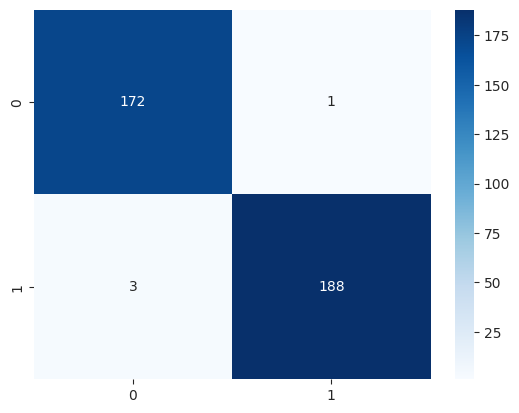

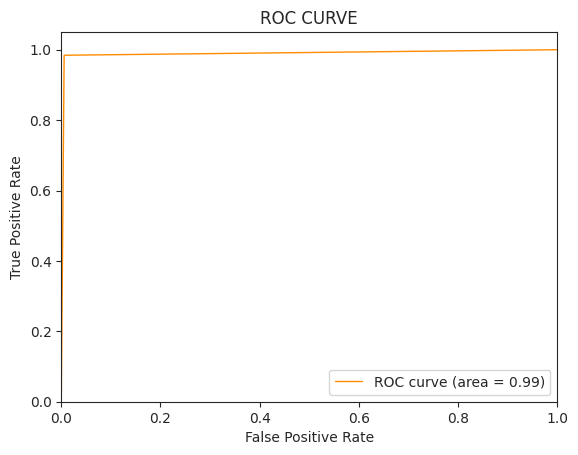

Performance: 

TPR=    98.28571428571429
TNR=    99.47089947089947
Pre=    99.42196531791907
FPR=    0.5291005291005291
FNR=    1.7142857142857144


Duration: 0:00:00.841266


(0.9888888888888887, 0.02545875386086579)

In [ ]:
from sklearn.svm import SVC
clf_svc = SVC(probability=True)
model_accuracy(classifier=clf_svc, predictors=x_train, target=y_train)

# Logistic regression

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       173
         1.0       0.99      0.95      0.97       191

    accuracy                           0.97       364
   macro avg       0.97      0.97      0.97       364
weighted avg       0.97      0.97      0.97       364



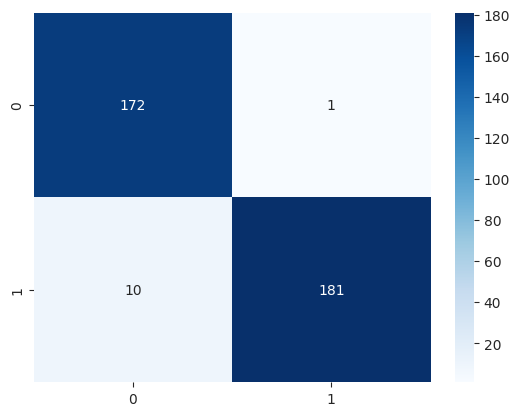

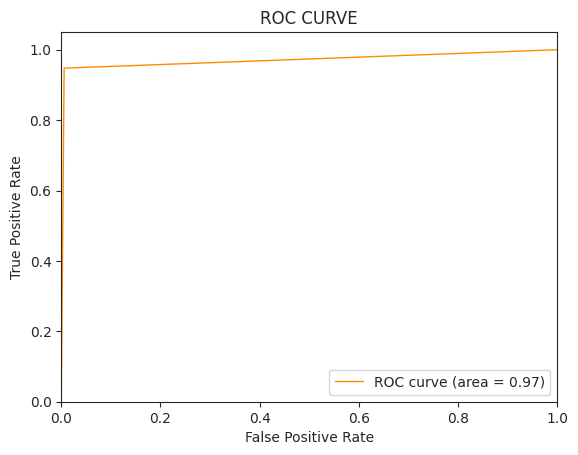

Performance: 

TPR=    94.5054945054945
TNR=    99.45054945054946
Pre=    99.42196531791907
FPR=    0.5494505494505495
FNR=    5.4945054945054945


Duration: 0:00:00.694993


(0.9695945945945945, 0.036123907505282535)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
model_accuracy(classifier=clf_lr, predictors=x_train, target=y_train)

In [ ]:
classifier_df = pd.DataFrame.from_dict(classifiers_description)
classifier_df.sort_values(by=["f1-score","standard_deviation"], ascending=False)

,model,precision,recall,f1-score,accuracy,standard_deviation
3,SVC,0.989076,0.989011,0.989014,0.988889,0.025459
2,MLPClassifier,0.978092,0.978022,0.978027,0.977853,0.038879
4,LogisticRegression,0.971003,0.969780,0.969799,0.969595,0.036124
0,GaussianNB,0.937580,0.936813,0.936850,0.936411,0.044936
1,BernoulliNB,0.678222,0.678571,0.678145,0.678529,0.051191


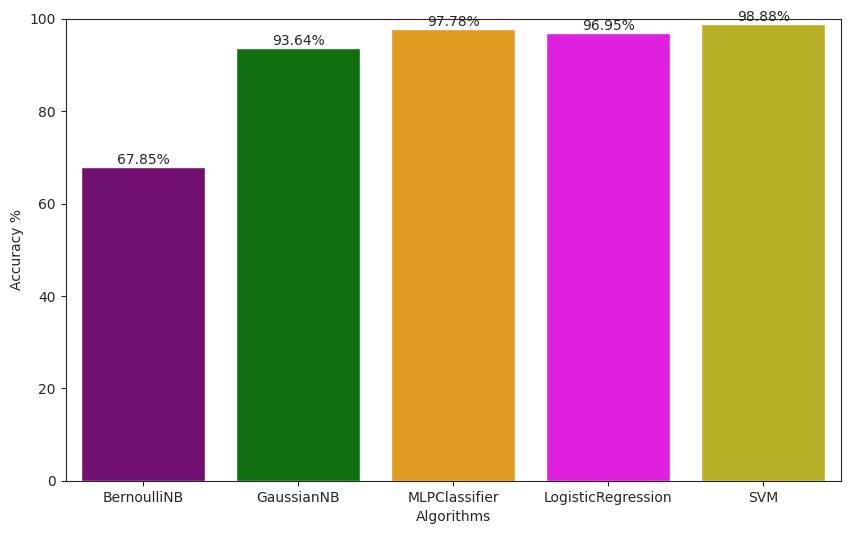

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE", "#87CEEB"]

df = pd.DataFrame(data=
{'Algorithms':['BernoulliNB','GaussianNB', 'MLPClassifier', 'LogisticRegression','SVM'],
'Accuracy %':[67.85,93.64 , 97.78, 96.95,98.88]})

plt.figure(figsize=(10,6))

p = sns.barplot(x='Algorithms', y='Accuracy %',data=df, palette=colors)
p.set_ylim(0, 100)
for i in p.containers:
    labels = [f'{v.get_height():0.02f}%' for v in i]
    p.bar_label(i, labels=labels)